In [1]:
# Import libraries

import psycopg2
import pandas as pd
from sqlalchemy import create_engine
from pprint import pprint


In [2]:
# Import the 'config' funtion from the config.py file

from config import config


In [3]:
# Establish a connection to the database by creating a cursor object

# Obtain the configuration parameters

params = config()


In [4]:
# Connect to to database

conn = psycopg2.connect(**params)


In [5]:
# Create a cursor object

cur = conn.cursor()

In [6]:
# A sample query of all data from the "department" table in the "Personnel_HW" database

cur.execute("""SELECT * FROM department""")
query_results = cur.fetchall()
pprint(query_results)


[('d001', 'Marketing'),
 ('d002', 'Finance'),
 ('d003', 'Human Resources'),
 ('d004', 'Production'),
 ('d005', 'Development'),
 ('d006', 'Quality Management'),
 ('d007', 'Sales'),
 ('d008', 'Research'),
 ('d009', 'Customer Service')]


In [7]:
# A function that takes in a PostgreSQL query and outputs a pandas database 

def create_pandas_table(sql_query, database = conn):
    table = pd.read_sql_query(sql_query, database)
    return table


In [9]:
# Utilize the create_pandas_table function to create a Pandas data frame
# Store the data as a variable

department_info = create_pandas_table("SELECT * FROM department ORDER BY dept_id")
department_info

,dept_id,dept
0,d001,Marketing
1,d002,Finance
2,d003,Human Resources
3,d004,Production
4,d005,Development
5,d006,Quality Management
6,d007,Sales
7,d008,Research
8,d009,Customer Service


In [11]:
salary_info = create_pandas_table("SELECT * FROM salary")
salary_info

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228
...,...,...
300019,499995,40000
300020,499996,58058
300021,499997,49597
300022,499998,40000


In [12]:
employee_info = create_pandas_table("SELECT * FROM employee")
employee_info

,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18
...,...,...,...,...,...,...,...
300019,464231,s0001,1958-08-14,Constantino,Eastman,M,1988-10-28
300020,255832,e0002,1955-05-08,Yuping,Dayang,F,1995-02-26
300021,76671,s0001,1959-06-09,Ortrud,Plessier,M,1988-02-24
300022,264920,s0001,1959-09-22,Percy,Samarati,F,1994-09-08


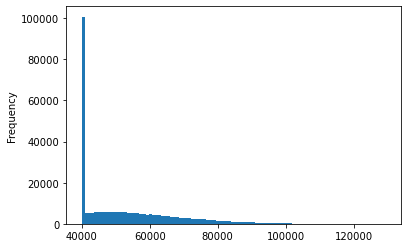

In [18]:
ax = salary_info['salary'].plot.hist(bins=100)

In [19]:
# Close the cursor and connection to so the server can allocate
# bandwidth to other requests

cur.close()
conn.close()
